In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
#import seaborn as sns
import timeit

In [2]:
# plot parameters
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')


In [3]:
source = 'ches_IOP3_parent_child1.'
folder_list=['27054','18825','17083','17446','6336','20526','8084','19605','11458','5386']
file = 'DATA_3D_AV_NETCDF_N02'
#file = 'DATA_1D_TS_NETCDF_N02'


Make a folder list and read in all the files from those folders.

In [ ]:
data_list = []
start_time = timeit.default_timer()

for i, name in enumerate(folder_list):
    folder = source + name
    ds = xr.open_dataset(folder + '/' + file)
    ds.close()
    #subset for variables
    data = ds['u']
    #subset for time = 13:30
    data = data.where(data.time.dt.seconds==48600,drop=True).squeeze('time')
    #append the data to the list
    data_list.append(data)
    
elapsed = timeit.default_timer() - start_time
print('Time elapsed ',elapsed, 'seconds')


Calculate ensemble mean of those runs

In [ ]:
ensemble_mean_w = data_list[0]

size = len(data_list)
#size = 2
for i in range(1,size):
    ensemble_mean_w = ensemble_mean_w + data_list[i]

ensemble_mean_w = ensemble_mean_w/size


Calculate ensemble average of the spatial mean for w_wind

In [ ]:
ensemble_spatial_mean_w = data_list[0].mean('xu').mean('y')

size = len(data_list)
# #size = 2
for i in range(1,size):
    ensemble_spatial_mean_w = ensemble_spatial_mean_w + data_list[i].mean('xu').mean('y')

ensemble_spatial_mean_w = ensemble_spatial_mean_w/size
ensemble_spatial_mean_w

In [ ]:
fig = plt.figure(figsize=(8,8))
data_list[0].sel(zu_3d=510).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
#ensemble_mean_w.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
ensemble_mean_w.sel(zu_3d=510).plot()

The heterogeneity induced w_hi = ensemble_mean_w_bar - ensemble_spatial_mean_w_bar

In [ ]:
w_hi = ensemble_mean_w - ensemble_spatial_mean_w

In [ ]:
fig = plt.figure(figsize=(8,8))
#w_hi.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
w_hi.sel(zu_3d=510).plot()

Calculate the variance for the same from its spatial mean:
(spatial_mean_w_hi - w_hi)*(spatial_mean_w_hi - w_hi)



In [ ]:
fig = plt.figure(figsize=(8,8))
w_hi.var('y',skipna=True).mean('xu').plot()

fig = plt.figure(figsize=(8,8))
w_hi.var('xu',skipna=True).mean('y').plot()


In [ ]:
print('Plot the spatial variance profiles for ensemble member values')
fig = plt.figure(figsize=(8,8))
data_list[0].var('xu',skipna=True).mean('y').plot()


### Combine the code from above to pull in data and calculate heterogeneity induced values

Time elapsed  18.320420218631625 seconds


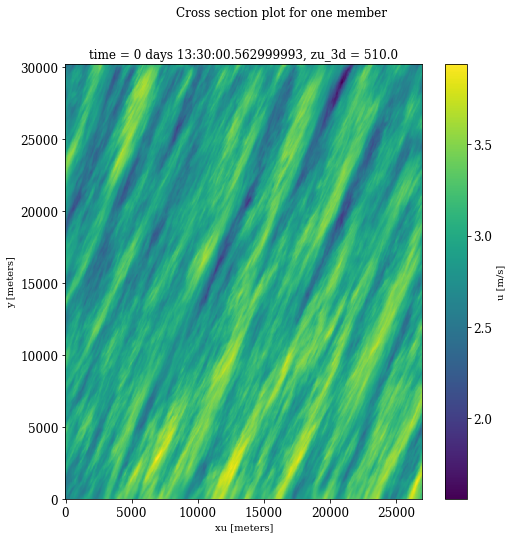

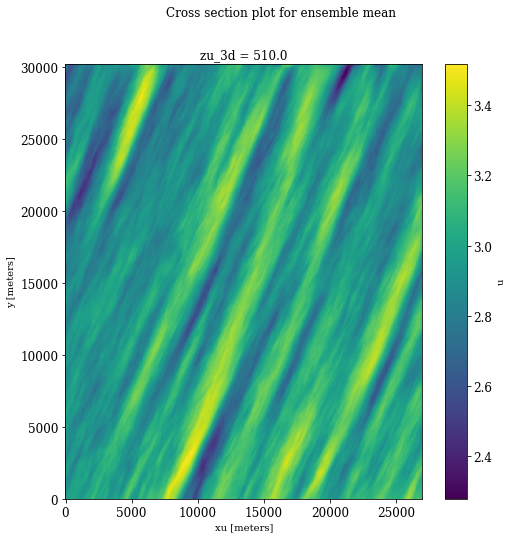

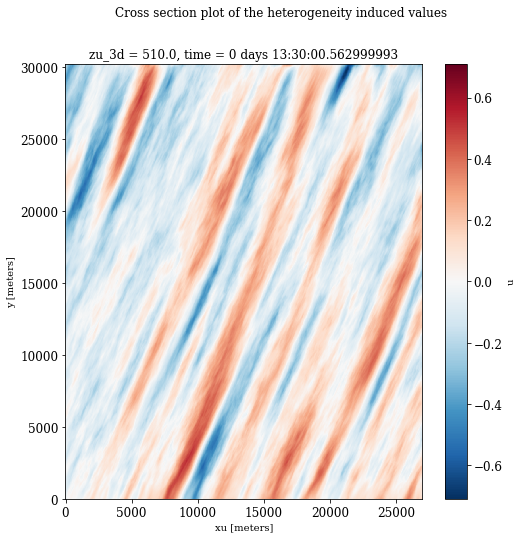

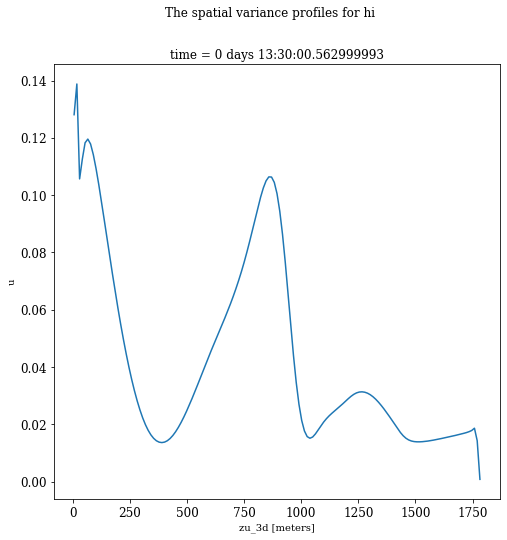

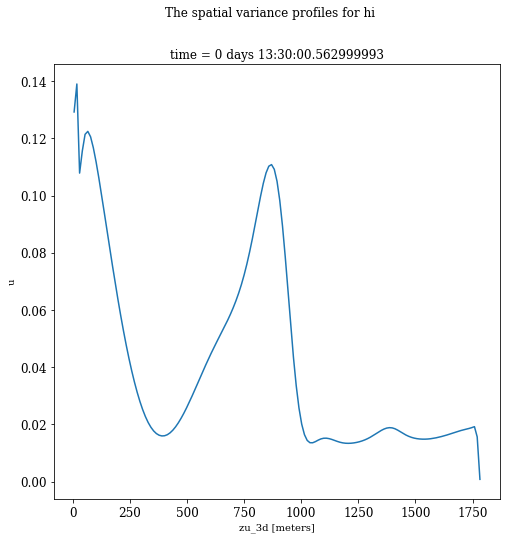

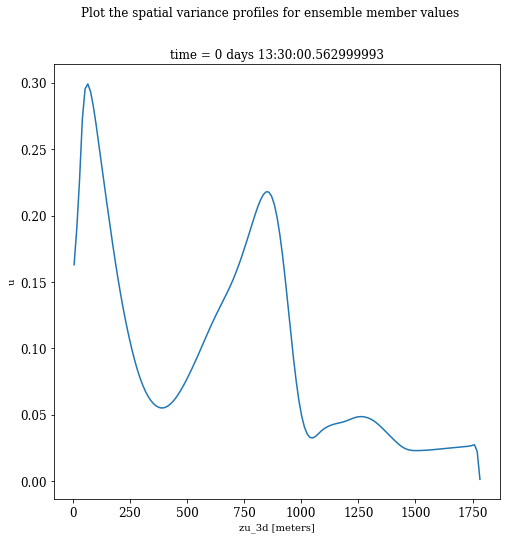

In [11]:
#Make folder list and read in values

data_list = []
start_time = timeit.default_timer()

for i, name in enumerate(folder_list):
    folder = source + name
    ds = xr.open_dataset(folder + '/' + file)
    ds.close()
    #subset for variables
    data = ds['u']
    #subset for time = 13:30
    data = data.where(data.time.dt.seconds==48600,drop=True).squeeze('time')
    #append the data to the list
    data_list.append(data)
    

#calculate their ensemble mean
#initialize with the first element
ensemble_mean = data_list[0]

size = len(data_list)
#size = 2
for i in range(1,size):
    ensemble_mean = ensemble_mean + data_list[i]

ensemble_mean = ensemble_mean/size


#calculate the spatial mean ( ensemble average of the spatial mean ~ spatial mean)
ensemble_spatial_mean = data_list[0].mean('xu').mean('y')

# size = len(data_list)
# # #size = 2
# for i in range(1,size):
#     ensemble_spatial_mean_w = ensemble_spatial_mean_w + data_list[i].mean('xu').mean('y')

# ensemble_spatial_mean_w = ensemble_spatial_mean_w/size
# ensemble_spatial_mean_w


#calculate the heterogeneity indiced values as the difference of the two
hi = ensemble_mean - ensemble_spatial_mean

# Calculate the variance for the same from its spatial mean: 
#     (spatial_mean_w_hi - w_hi)*(spatial_mean_w_hi - w_hi)




#plots
fig = plt.figure(figsize=(8,8))
data_list[0].sel(zu_3d=510).plot()
fig.suptitle('Cross section plot for one member')

fig = plt.figure(figsize=(8,8))
#ensemble_mean_w.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
ensemble_mean.sel(zu_3d=510).plot()
fig.suptitle('Cross section plot for ensemble mean')


fig = plt.figure(figsize=(8,8))
#w_hi.sel(zw_3d=504).plot(vmin=-1.5,vmax=1.5,cmap='RdBu_r')
hi.sel(zu_3d=510).plot()
fig.suptitle('Cross section plot of the heterogeneity induced values')

fig = plt.figure(figsize=(8,8))
hi.var('y',skipna=True).mean('xu').plot()
fig.suptitle('The spatial variance profiles for hi')
fig = plt.figure(figsize=(8,8))
hi.var('xu',skipna=True).mean('y').plot()
fig.suptitle('The spatial variance profiles for hi')
      

fig = plt.figure(figsize=(8,8))
data_list[0].var('y',skipna=True).mean('xu').plot()
fig.suptitle('Plot the spatial variance profiles for ensemble member values')
    
      
elapsed = timeit.default_timer() - start_time
print('Time elapsed ',elapsed, 'seconds')


In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(y=504).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(y=833).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(x=447).plot()

In [ ]:
fig = plt.figure(figsize=(8,8))
w_data.isel(x=666).plot()

Do a 3D 2D plot?

In [ ]:
y_indices = [167,333,500,667,833]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,8))

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
w_data

In [ ]:
X.shape

In [ ]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

# Make data.
X = w_data.x.values
Y = w_data.y.values
X, Y = np.meshgrid(X, Y)
Z = w_data.isel(zw_3d=50).values

# Plot the surface.

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
